# Homework 2

# Exercise 1

# 1.0 Loading booli-data and some libraries

In [16]:

library(dplyr)
library(knitr)
library(stats)
library(base)
library(ggplot2)

data <- read.csv('/Users/sebastianbaarsen/Documents/GitHub/su-mt4007/Homeworks/Homework_2/data/Booli_sold.csv')
data <- tibble(data)

# 1.1 Added price per sqauremeter

## Adding the variable ppsqm (price per square-meter):

In [25]:
updated_data <- data %>%
mutate(ppsqm=soldPrice/livingArea) %>%
select(c(1:4),ppsqm,everything())
head(updated_data)

listPrice,rent,livingArea,rooms,ppsqm,published,constructionYear,objectType,booliId,soldDate,⋯,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
3995000,4467,73,3,52328.77,2018-10-15 13:33:18,1935,Lägenhet,3263989,2018-11-08,⋯,59.37103,18.05406,NA,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1995000,1773,36,1,65416.67,2018-10-05 14:29:28,1968,Lägenhet,3256231,2018-10-19,⋯,59.37124,18.05782,NA,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
5100000,3839,81,3,75432.10,2018-09-11 13:44:43,1936,Lägenhet,3236660,2018-09-27,⋯,59.37162,18.05472,NA,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
5495000,4483,107,4,75233.64,2018-08-25 02:56:56,1936,Lägenhet,3224374,2018-09-06,⋯,59.37148,18.05388,NA,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
1995000,1696,29,1,82758.62,2018-06-15 17:16:19,1936,Lägenhet,3185496,2018-06-18,⋯,59.37216,18.05354,TRUE,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
7495000,5923,125,4,71600.00,2018-06-09 10:51:27,1936,Lägenhet,3181135,2018-06-21,⋯,59.37148,18.05388,NA,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/


# 1.2 Top 5 expensive objects (excluded some variables)

In [12]:
sorted_by_price <- updated_data %>% arrange(desc(ppsqm)) %>% select(booliId,soldPrice,c(rent:ppsqm))
df <- head(sorted_by_price,5)
kable(df)



| booliId| soldPrice| rent| livingArea| rooms|     ppsqm|
|-------:|---------:|----:|----------:|-----:|---------:|
| 2018259|   2500000| 1464|       24.0|     1| 104166.67|
| 2125576|   2450000| 1464|       24.0|     1| 102083.33|
| 2078171|   2300000| 1374|       23.0|     1| 100000.00|
| 2330886|   2210000| 1144|       25.0|     1|  88400.00|
| 2067384|   2300000| 1522|       26.9|     1|  85501.86|

# 1.3 Mean price per square-meter in Ekhagen


In [22]:
mean_ekhagen <- mean(updated_data$ppsqm, na.rm = TRUE) 
paste(round(mean_ekhagen),' kr/sqm')

[1] "58759  kr/sqm"

# 1.4 An interessting aspect

## We can see that the spread/variance of the difference in listingprice and soldprice seems to increase with the living area. This is intuitively reasonable.

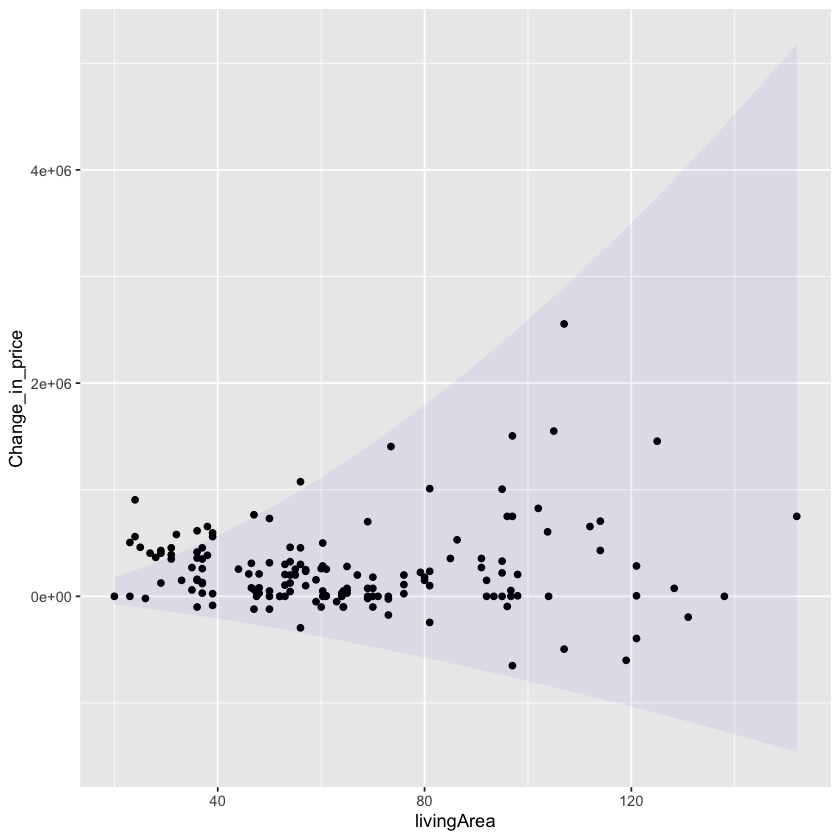

In [50]:
change_in_price_df <- updated_data %>% 
  transmute(livingArea = livingArea, Change_in_price = soldPrice-listPrice)
  

ggplot(change_in_price_df,aes(livingArea,Change_in_price))+
  geom_point(na.rm = TRUE)+
  geom_ribbon(aes(ymin = -1000 * livingArea^1.45, ymax = 1300 * livingArea^1.65), alpha = 0.05, fill = "blue")

# Exercise 2


# 2.0  Loading votes-data

In [28]:
votes <- read.csv("/Users/sebastianbaarsen/Documents/GitHub/su-mt4007/Homeworks/Homework_2/data/2018_R_per_kommun.csv",sep = ";")
votes <- tibble(votes)

# 2.1 Legitimate votes  in Stockholm

In [51]:
stockholm <- votes %>% filter(LÄNSNAMN == 'Stockholms län')
res <-sum(stockholm$RÖSTER.GILTIGA)
paste("Legitimate votes  in Stockholm:",res,'st')

[1] "Legitimate votes  in Stockholm: 1426237 st"

# 2.2 Social demokraterna have the highest voting percentage in Munkfors.


In [52]:
by_s_popularity <- votes %>%
  mutate(S= as.numeric(gsub( ",", ".", S))) %>%  # (must transform vote-proportion from str to numeric)
  arrange(desc(S)) %>%                           
  select(LÄNSNAMN:KOMMUNNAMN,S,M:FI)

kable(head(by_s_popularity))



|LÄNSNAMN          |KOMMUNNAMN |     S|M     |C    |L    |KD   |V     |MP   |SD    |FI   |
|:-----------------|:----------|-----:|:-----|:----|:----|:----|:-----|:----|:-----|:----|
|Värmlands län     |Munkfors   | 52.18|8,33  |8,12 |2,91 |3,93 |6,11  |1,37 |15,43 |0,64 |
|Norrbottens län   |Piteå      | 47.48|11,82 |7,49 |2,52 |4,8  |10,56 |2,42 |11,81 |0,4  |
|Värmlands län     |Hagfors    | 47.46|9,27  |7,86 |2,33 |4,51 |8,27  |1,34 |18    |0,24 |
|Norrbottens län   |Överkalix  | 46.68|7,81  |8,79 |2,1  |3,44 |10,49 |1,07 |18,34 |0,22 |
|Norrbottens län   |Kalix      | 45.37|11,71 |6,42 |2,87 |3,58 |7,88  |2,79 |18,37 |0,24 |
|Västerbottens län |Skellefteå | 45.31|11,95 |8,83 |3,38 |4,88 |9,76  |3,03 |11,66 |0,45 |

# 2.3 Voter turnout is highest in Lomma, Habo, and Vellinge in corresponding order.

In [46]:
by_participation <- votes %>% 
  select(LÄNSNAMN:KOMMUNNAMN,VALDELTAGANDE) %>% 
  mutate(VALDELTAGANDE= as.numeric(gsub(',','.',VALDELTAGANDE))) %>% 
  arrange(desc(VALDELTAGANDE)) %>%
  mutate(VALDELTAGANDE = paste(VALDELTAGANDE,'%'))

kable(head(by_participation,3))



|LÄNSNAMN       |KOMMUNNAMN |VALDELTAGANDE |
|:--------------|:----------|:-------------|
|Skåne län      |Lomma      |93.86 %       |
|Jönköpings län |Habo       |93.35 %       |
|Skåne län      |Vellinge   |93.13 %       |

# Exercise 3

# 3.0 Loading stroke-data

In [38]:
stroke <- read.csv('/Users/sebastianbaarsen/Documents/GitHub/su-mt4007/Homeworks/Homework_2/data/stroke-data.csv')

# 3.1
## I sorted the patients by BMI and grouped them into bmi intervals. Then, I calculated the proportion of stroke patients in each bmi group. We can observe a clear increase in stroke cases as bmi increases. An interesting aspect is that the proportion of stroke cases seems to taper off after a certain point, maybe the person died of something else at that extreme levels of bmi, or maybe the data is not sufficient.

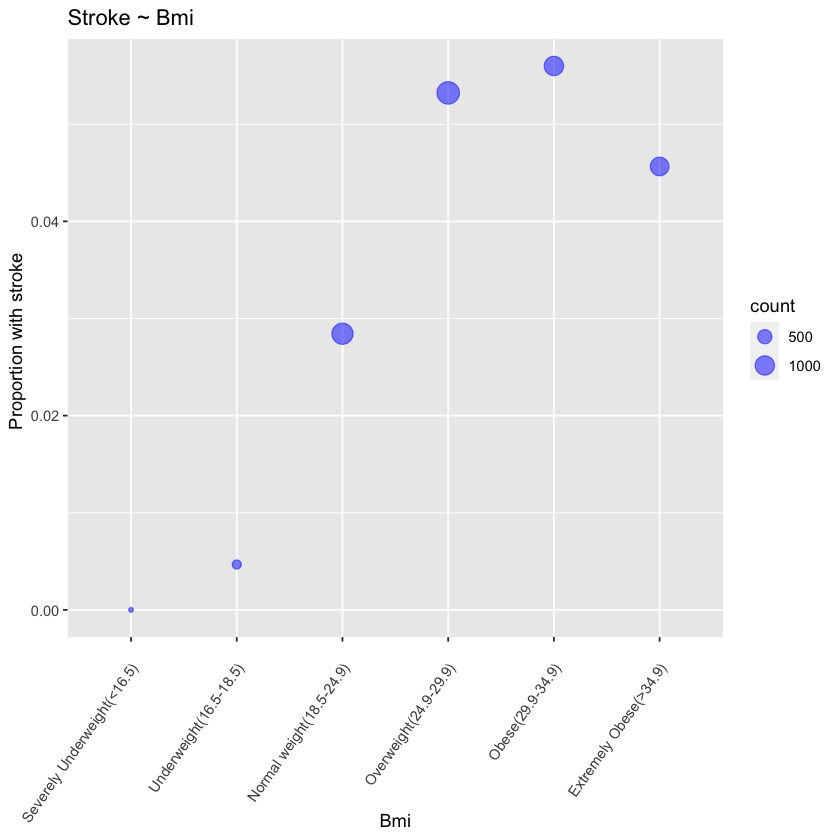

In [40]:
bmi_group_df <- stroke %>%  
  select(bmi,stroke) %>% 
  filter(grepl("^[0-9.,]+$", bmi)) %>%
  mutate(bmi = as.numeric(gsub(',','.',bmi))) %>% 
  filter(!is.na(bmi)) %>% 
  mutate(bmi_category = cut(bmi, 
                             breaks = c(-Inf, 16.5, 18.5, 24.9, 29.9, 34.9, Inf),
                            labels = c("Severely Underweight(<16.5)", "Underweight(16.5-18.5)", "Normal weight(18.5-24.9)",
                                       "Overweight(24.9-29.9)", "Obese(29.9-34.9)", "Extremely Obese(>34.9)"))) %>% 
  select(bmi_category,stroke)  %>% 
  group_by(bmi_category) %>% 
  summarize(count = n(), proportion_of_stroke = mean(stroke, na.rm = TRUE))
  


ggplot(bmi_group_df,aes(bmi_category,proportion_of_stroke))+ 
   geom_point(aes(size = count),alpha = 1/2, col='blue')+
   theme(axis.text.x = element_text(angle = 55, vjust = 0.9, hjust = 1))+
   labs(x = "Bmi", y = "Proportion with stroke ", title = "Stroke ~ Bmi ")

